<a href="https://colab.research.google.com/github/LegendsDen/Heart-Disease-Prediction-CS361/blob/main/ML_models(CS361).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.duplicated().sum()

np.int64(18078)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(301717, 18)

In [ ]:
df.isna().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
count_target = df['HeartDisease'].value_counts()
count_target

,count
HeartDisease,
No,274456
Yes,27261


In [ ]:
def remove_outliers_from_dataframe(df):

    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
df=remove_outliers_from_dataframe(df)

In [ ]:
df.shape

(213956, 18)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,213956.000000,213956.000000,213956.00000,213956.000000
mean,27.654270,0.420937,0.81306,7.146362
std,5.212137,1.098286,1.68923,1.150021
min,12.650000,0.000000,0.00000,3.000000
25%,23.780000,0.000000,0.00000,6.000000
50%,27.120000,0.000000,0.00000,7.000000
75%,30.900000,0.000000,0.00000,8.000000
max,43.080000,5.000000,7.00000,11.000000


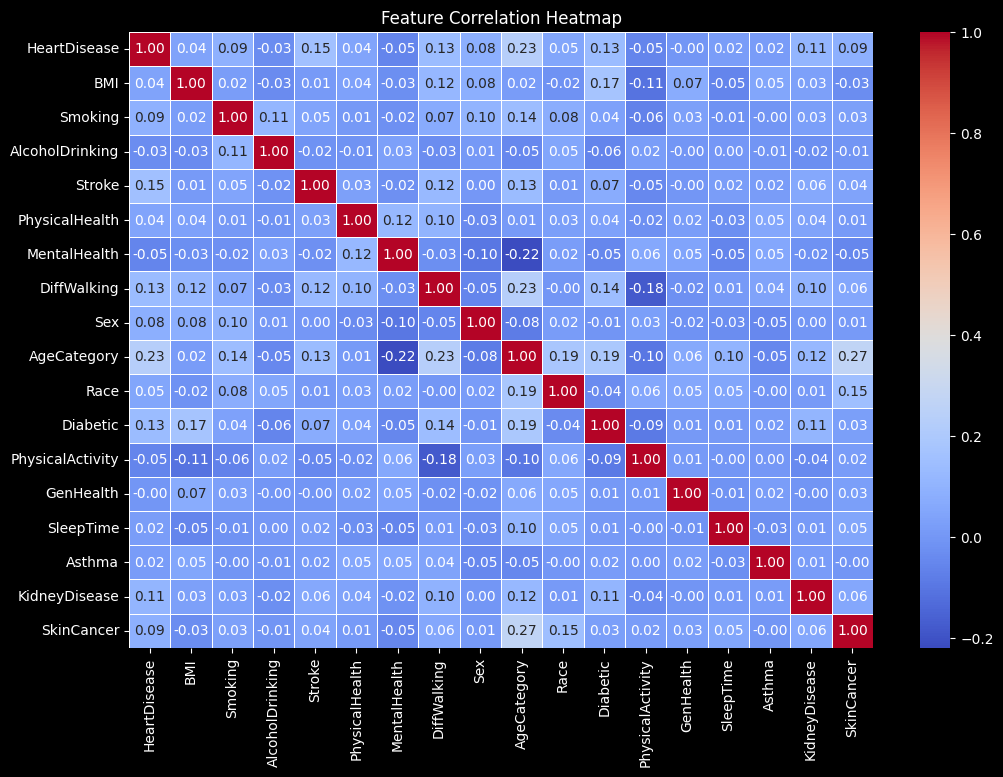

In [ ]:
# Encode categorical variables

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

In [ ]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [ ]:
df[['BMI', 'BMI_Category']].head(10)

,BMI,BMI_Category
1,20.34,Normal weight
3,24.21,Normal weight
7,31.64,Obesity I
8,26.45,Overweight
9,40.69,Obesity III
11,28.71,Overweight
12,28.37,Overweight
15,29.18,Overweight
16,26.26,Overweight
18,29.86,Overweight


In [ ]:
df['BMI_Category'].value_counts()

,count
BMI_Category,
Overweight,79806
Normal weight,66192
Obesity I,42928
Obesity II,17035
Obesity III,4722
Underweight,3273


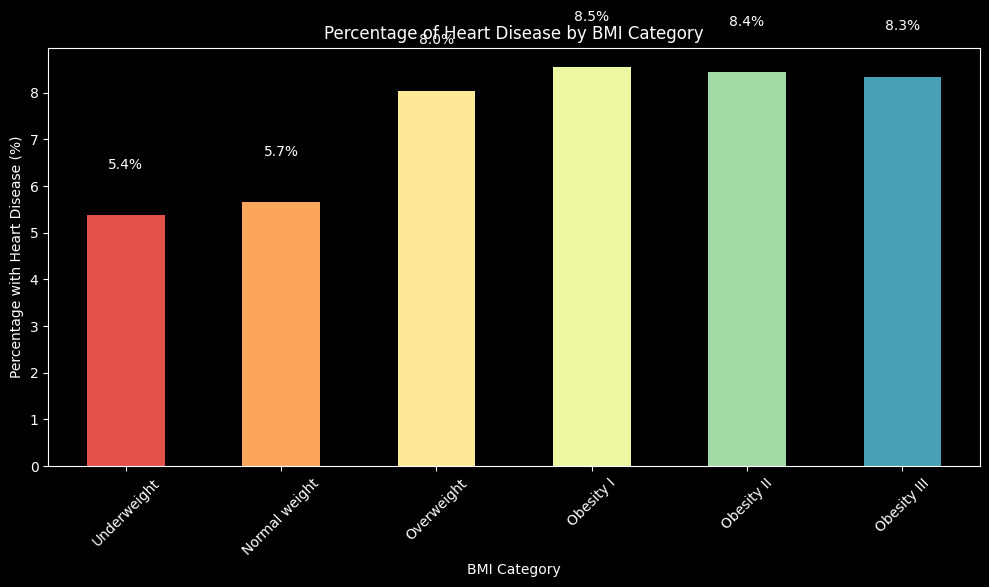

In [ ]:
# First, calculate the percentage of heart disease in each BMI category
total_by_bmi = df['BMI_Category'].value_counts()
heart_disease_by_bmi = df[df['HeartDisease'] == 'Yes']['BMI_Category'].value_counts()
percentage_heart_disease = (heart_disease_by_bmi / total_by_bmi) * 100

# Create a new Series with the correct order
ordered_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in ordered_categories],
                               index=ordered_categories)

# Now plot the percentages
plt.figure(figsize=(10,6))
ax = ordered_percentages.plot(kind='bar', color=sns.color_palette('Spectral', len(ordered_categories)))

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.title('Percentage of Heart Disease by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage with Heart Disease (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

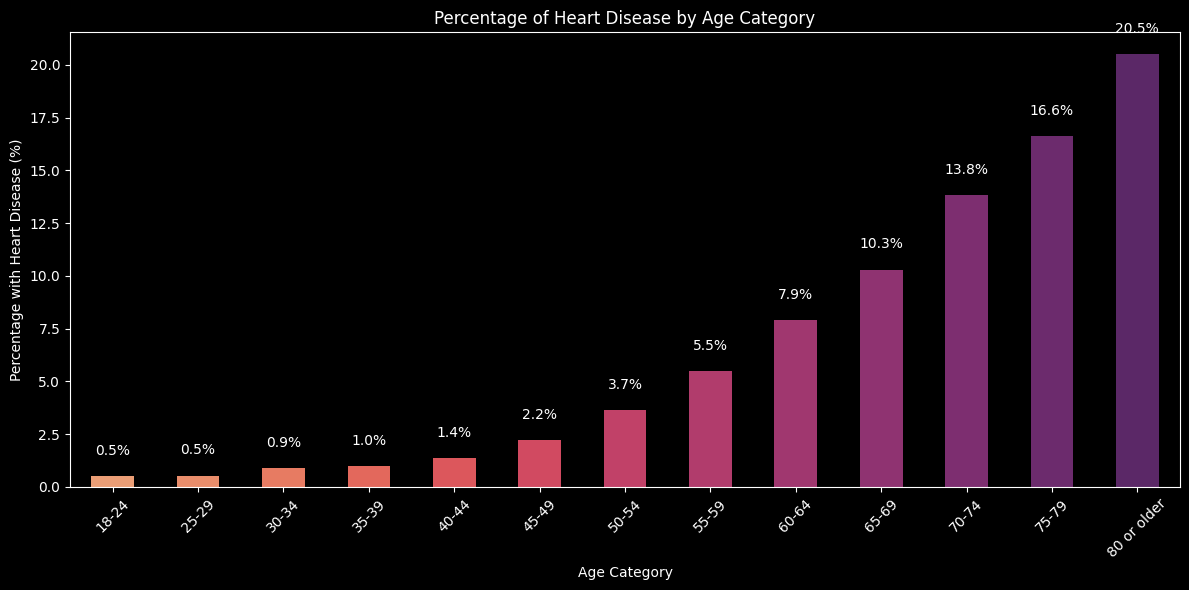

In [ ]:
# Define correct order for AgeCategory
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Calculate the percentage of heart disease in each age category
total_by_age = df['AgeCategory'].value_counts()
heart_disease_by_age = df[df['HeartDisease'] == 'Yes']['AgeCategory'].value_counts()
percentage_heart_disease = (heart_disease_by_age / total_by_age) * 100

# Create a new Series with the correct order
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in age_order],
                               index=age_order)

# Now plot the percentages
plt.figure(figsize=(12,6))
ax = ordered_percentages.plot(kind='bar', color=sns.color_palette('flare', len(age_order)))

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.title('Percentage of Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage with Heart Disease (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

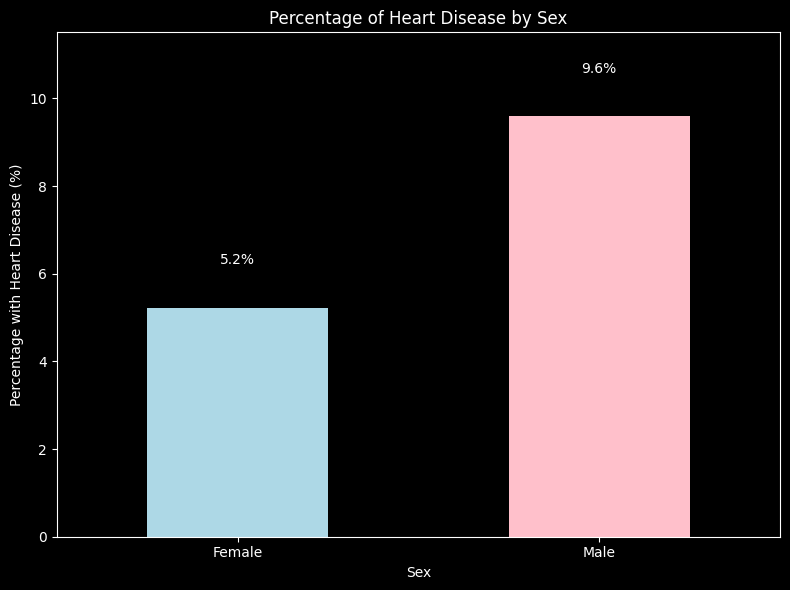

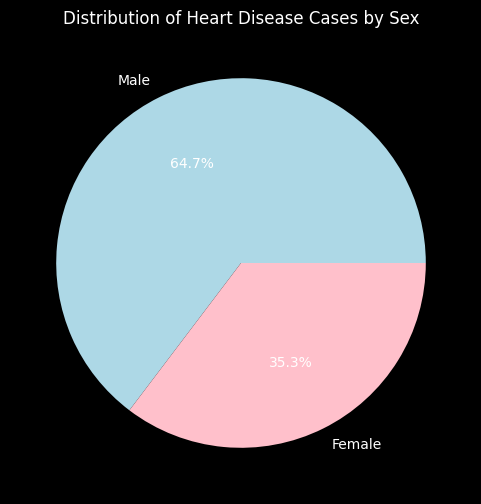

In [ ]:
# Calculate percentage of heart disease for each sex
total_by_sex = df['Sex'].value_counts()
heart_disease_by_sex = df[df['HeartDisease'] == 'Yes']['Sex'].value_counts()
percentage_heart_disease = (heart_disease_by_sex / total_by_sex) * 100

# Create a bar chart to show these percentages
plt.figure(figsize=(8, 6))
ax = percentage_heart_disease.plot(kind='bar', color=['lightblue', 'pink'])

# Add percentage labels on top of each bar
for i, v in enumerate(percentage_heart_disease):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.title('Percentage of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage with Heart Disease (%)')
plt.ylim(0, max(percentage_heart_disease) * 1.2)  # Add some space for labels
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# If you still want a pie chart of raw counts, keep your original code too
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_by_sex.values, labels=heart_disease_by_sex.index,
        autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Distribution of Heart Disease Cases by Sex")
plt.show()

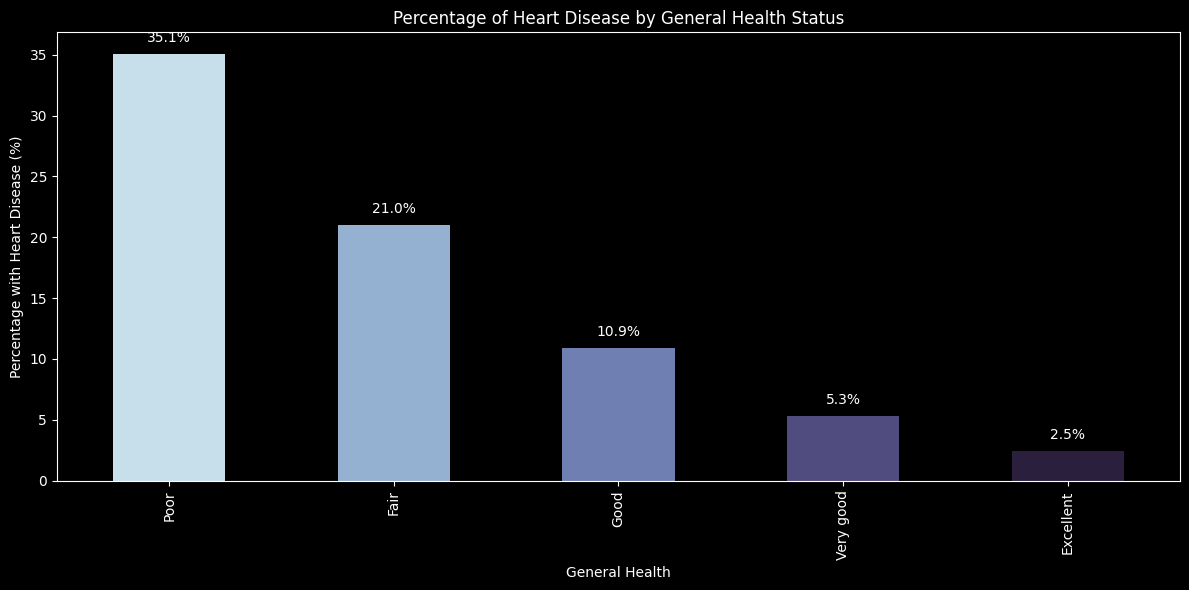

In [ ]:
# Define correct order for GenHealth if needed
genhealth_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Calculate the percentage of heart disease in each general health category
total_by_health = df['GenHealth'].value_counts()
heart_disease_by_health = df[df['HeartDisease'] == 'Yes']['GenHealth'].value_counts()
percentage_heart_disease = (heart_disease_by_health / total_by_health) * 100

# Create a new Series with the correct order
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in genhealth_order],
                               index=genhealth_order)

# Now plot the percentages
plt.figure(figsize=(12,6))
ax = ordered_percentages.plot(kind='bar', color=sns.color_palette('ch:s=.25,rot=-.25', len(genhealth_order)))

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.title('Percentage of Heart Disease by General Health Status')
plt.xlabel('General Health')
plt.ylabel('Percentage with Heart Disease (%)')
plt.tight_layout()
plt.show()

In [ ]:
df['SleepTime']

,SleepTime
1,7.0
3,6.0
7,9.0
8,5.0
9,10.0
...,...
319786,8.0
319788,6.0
319789,8.0
319791,5.0


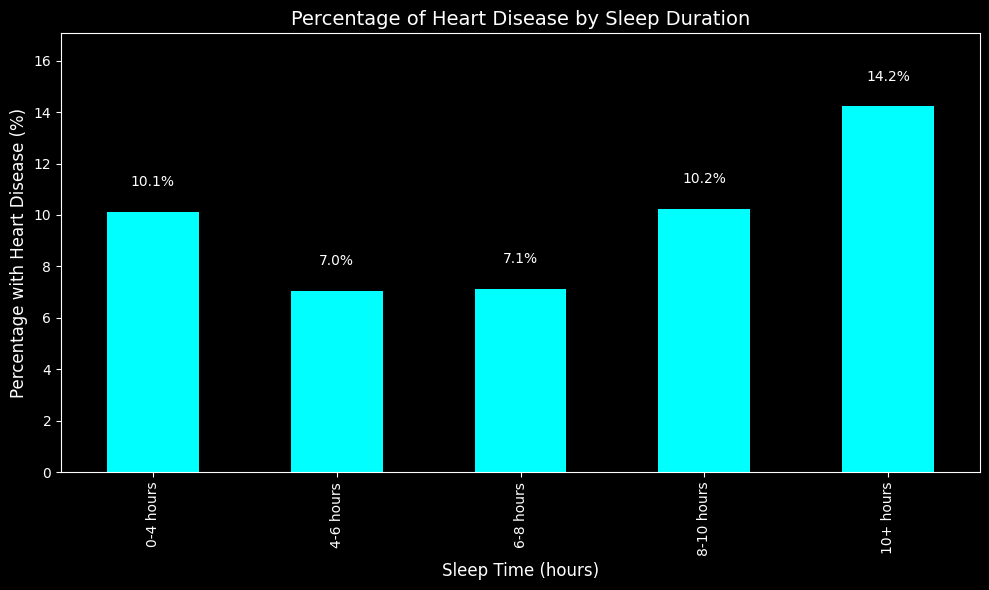

In [ ]:
# Keep the dark background (if you want to be consistent with your previous plots)
plt.style.use("dark_background")

# Define sleep time categories
sleep_bins = [0, 4, 6, 8, 10, 24]  # Define meaningful sleep hour bins
sleep_labels = ['0-4 hours', '4-6 hours', '6-8 hours', '8-10 hours', '10+ hours']

# Create temporary categories without adding to df
temp_sleep_categories = pd.cut(df['SleepTime'], bins=sleep_bins, labels=sleep_labels, right=True)

# Calculate the percentage of heart disease in each sleep category
total_by_sleep = temp_sleep_categories.value_counts()
heart_disease_mask = df['HeartDisease'] == 'Yes'
heart_disease_by_sleep = temp_sleep_categories[heart_disease_mask].value_counts()
percentage_heart_disease = (heart_disease_by_sleep / total_by_sleep) * 100

# Order by sleep duration
sleep_order = sleep_labels  # Already in order

# Create a new Series with the correct order
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in sleep_order],
                               index=sleep_order)

# Plot the percentages
plt.figure(figsize=(10, 6))
ax = ordered_percentages.plot(kind='bar', color='cyan')  # Using cyan to match your earlier plots

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', color='white')

plt.title('Percentage of Heart Disease by Sleep Duration', fontsize=14, color='white')
plt.xlabel('Sleep Time (hours)', fontsize=12, color='white')
plt.ylabel('Percentage with Heart Disease (%)', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Add some space at the top for labels
plt.ylim(0, max(ordered_percentages) * 1.2)

plt.tight_layout()
plt.show()

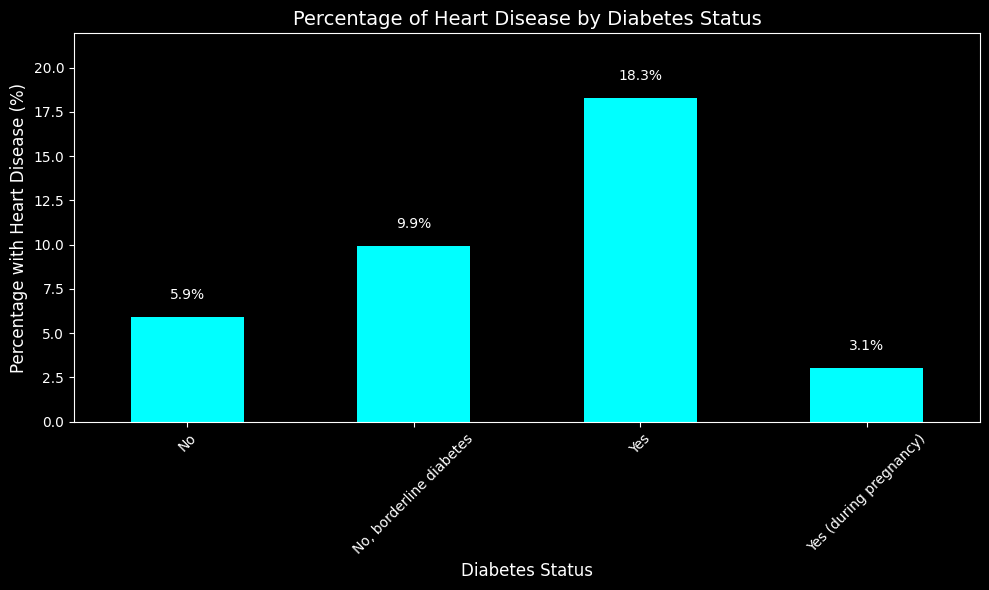

In [ ]:
# Keep the dark background
plt.style.use("dark_background")

# Calculate the percentage of heart disease for each diabetes status
total_by_diabetes = df['Diabetic'].value_counts()
heart_disease_by_diabetes = df[df['HeartDisease'] == 'Yes']['Diabetic'].value_counts()
percentage_heart_disease = (heart_disease_by_diabetes / total_by_diabetes) * 100

# Create a more meaningful order if needed
diabetes_order = ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']

# Create a new Series with the correct order
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in diabetes_order],
                               index=diabetes_order)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = ordered_percentages.plot(kind='bar', color='cyan')

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', color='white')

# Set labels and title
plt.xlabel("Diabetes Status", fontsize=12, color='white')
plt.ylabel("Percentage with Heart Disease (%)", fontsize=12, color='white')
plt.title("Percentage of Heart Disease by Diabetes Status", fontsize=14, color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Add some space at the top for labels
plt.ylim(0, max(ordered_percentages) * 1.2)

plt.tight_layout()
plt.show()

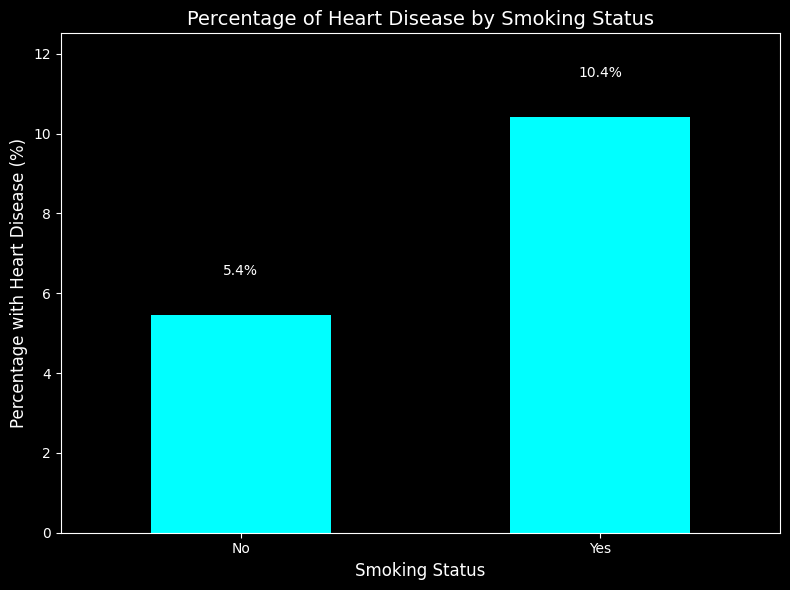

In [ ]:
# Keep the dark background
plt.style.use("dark_background")

# Calculate the percentage of heart disease for each smoking status
total_by_smoking = df['Smoking'].value_counts()
heart_disease_by_smoking = df[df['HeartDisease'] == 'Yes']['Smoking'].value_counts()
percentage_heart_disease = (heart_disease_by_smoking / total_by_smoking) * 100

# Create ordered series with all possible values
smoking_order = ['No', 'Yes']  # Assuming these are the values in your dataset
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in smoking_order],
                               index=smoking_order)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = ordered_percentages.plot(kind='bar', color='cyan')

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', color='white')

# Set labels and title
plt.xlabel("Smoking Status", fontsize=12, color='white')
plt.ylabel("Percentage with Heart Disease (%)", fontsize=12, color='white')
plt.title("Percentage of Heart Disease by Smoking Status", fontsize=14, color='white')

# Rotate x-axis labels if needed
plt.xticks(rotation=0, color='white')  # No rotation needed for just Yes/No
plt.yticks(color='white')

# Add some space at the top for labels
plt.ylim(0, max(ordered_percentages) * 1.2)

plt.tight_layout()
plt.show()

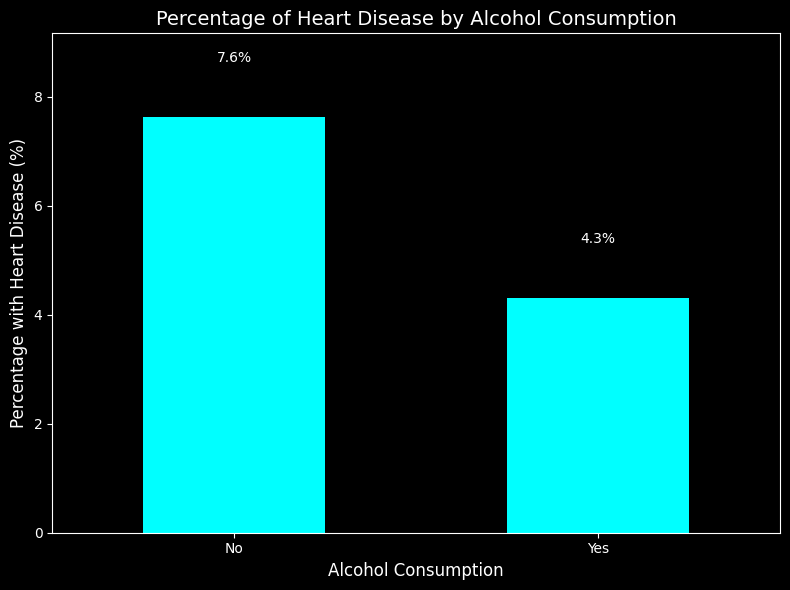

In [ ]:
# Keep the dark background
plt.style.use("dark_background")

# Calculate the percentage of heart disease for each alcohol status
total_by_alcohol = df['AlcoholDrinking'].value_counts()
heart_disease_by_alcohol = df[df['HeartDisease'] == 'Yes']['AlcoholDrinking'].value_counts()
percentage_heart_disease = (heart_disease_by_alcohol / total_by_alcohol) * 100

# Create ordered series with all possible values
alcohol_order = ['No', 'Yes']  # Assuming these are the values in your dataset
ordered_percentages = pd.Series([percentage_heart_disease.get(cat, 0) for cat in alcohol_order],
                               index=alcohol_order)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = ordered_percentages.plot(kind='bar', color='cyan')

# Add percentage labels on top of each bar
for i, v in enumerate(ordered_percentages):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', color='white')

# Set labels and title
plt.xlabel("Alcohol Consumption", fontsize=12, color='white')
plt.ylabel("Percentage with Heart Disease (%)", fontsize=12, color='white')
plt.title("Percentage of Heart Disease by Alcohol Consumption", fontsize=14, color='white')

# Rotate x-axis labels if needed
plt.xticks(rotation=0, color='white')  # No rotation needed for just Yes/No
plt.yticks(color='white')

# Add some space at the top for labels
plt.ylim(0, max(ordered_percentages) * 1.2)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_Category
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal weight
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Normal weight
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No,Obesity I
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,Overweight
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,Obesity III


In [ ]:


ordinal_cols = ['BMI_Category', 'AgeCategory', 'Race', 'GenHealth']
boolean_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','Sex']

ordinal_mappings = {
    'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'Race': ['White', 'Black', 'Asian','Hispanic', 'American Indian/Alaskan Native', 'Other'],
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
}


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]), ordinal_cols),  # Ordinal encoding
        ('ohe', OneHotEncoder(drop='first'), boolean_cols)  # OneHotEncoding for boolean columns
    ],
    remainder='passthrough'
)


df_transformed = preprocessor.fit_transform(df)

# Convert the transformed data back to a DataFrame with appropriate column names
# Ordinal columns retain original names, while OneHotEncoder generates new columns
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(boolean_cols)
final_columns = ordinal_cols + list(ohe_columns) + [col for col in df.columns if col not in ordinal_cols + boolean_cols]

df_encoded = pd.DataFrame(df_transformed, columns=final_columns)

In [ ]:

df_encoded.head()

,BMI_Category,AgeCategory,Race,GenHealth,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,"Diabetic_No, borderline diabetes",...,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Sex_Male,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
1,1.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,24.21,0.0,0.0,6.0
2,3.0,12.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,31.64,5.0,0.0,9.0
3,2.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,26.45,0.0,0.0,5.0
4,5.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,40.69,0.0,0.0,10.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213956 entries, 0 to 213955
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI_Category                      213956 non-null  float64
 1   AgeCategory                       213956 non-null  float64
 2   Race                              213956 non-null  float64
 3   GenHealth                         213956 non-null  float64
 4   HeartDisease_Yes                  213956 non-null  float64
 5   Smoking_Yes                       213956 non-null  float64
 6   AlcoholDrinking_Yes               213956 non-null  float64
 7   Stroke_Yes                        213956 non-null  float64
 8   DiffWalking_Yes                   213956 non-null  float64
 9   Diabetic_No, borderline diabetes  213956 non-null  float64
 10  Diabetic_Yes                      213956 non-null  float64
 11  Diabetic_Yes (during pregnancy)   213956 non-null  f

In [ ]:
X = df_encoded.drop('HeartDisease_Yes', axis=1)

y = df_encoded['HeartDisease_Yes']

In [ ]:

scale = StandardScaler()
X_scaled= scale.fit_transform(X)

In [ ]:
X.head()

,BMI_Category,AgeCategory,Race,GenHealth,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Sex_Male,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,12.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
1,1.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.21,0.0,0.0,6.0
2,3.0,12.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,31.64,5.0,0.0,9.0
3,2.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.45,0.0,0.0,5.0
4,5.0,9.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.69,0.0,0.0,10.0


<Axes: >

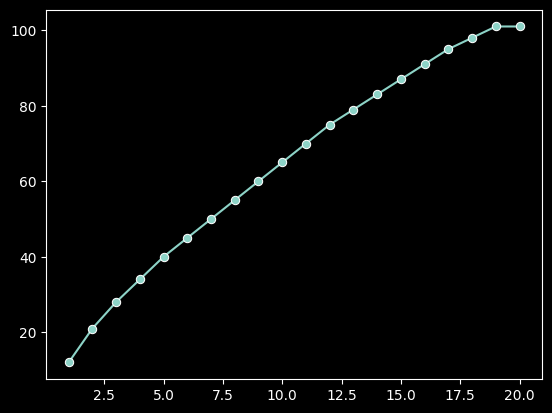

In [ ]:

decom = PCA(svd_solver='auto')
X_pca = decom.fit_transform(X_scaled)
ex_var = np.cumsum(np.round(decom.explained_variance_ratio_, 2) * 100)
sns.lineplot(y=ex_var, x=np.arange(1, len(ex_var) + 1), marker='o')

In [ ]:
X_pca.shape

(213956, 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print(f'{model_name} Accuracy: {recall:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return recall

In [ ]:

def compare_with_random_classifier(model, X_test, y_test, model_name):
    # Your model's predicted probabilities
    y_scores_model = model.predict_proba(X_test)[:, 1]
    precision_model, recall_model, _ = precision_recall_curve(y_test, y_scores_model)
    ap_model = average_precision_score(y_test, y_scores_model)

    # Random classifier: random probabilities
    np.random.seed(42)  # For reproducibility
    y_scores_random = np.random.rand(len(y_test))
    precision_rand, recall_rand, _ = precision_recall_curve(y_test, y_scores_random)
    ap_rand = average_precision_score(y_test, y_scores_random)

    # Plot both PR curves
    plt.figure(figsize=(8, 6))
    plt.plot(recall_model, precision_model, label=f'{model_name} (AP = {ap_model:.2f})', color='blue')
    plt.plot(recall_rand, precision_rand, label=f'Random Classifier (AP = {ap_rand:.2f})', color='red', linestyle='--')

    plt.title('Precision-Recall Curve Comparison')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{model_name} Average Precision Score: {ap_model:.4f}")
    print(f"Random Classifier Average Precision Score: {ap_rand:.4f}")

In [ ]:
X_train

array([[-6.43497361e-01, -1.23267476e+00, -7.30198546e-02, ...,
        -1.30921982e+00, -1.10707808e+00,  1.76124154e-02],
       [ 1.79367712e+00,  1.45554063e+00, -4.40232786e-01, ...,
         1.47400877e+00, -1.57692416e-01,  3.21279795e-01],
       [-3.06062650e-01, -1.77574890e-01,  8.25969173e-01, ...,
        -8.75552760e-01, -4.52139542e-01, -1.84097608e-01],
       ...,
       [-1.80115204e+00,  1.12654909e-01,  3.23510200e-01, ...,
        -4.61368118e-01, -7.83028566e-01,  6.08576761e-04],
       [-9.77433200e-01, -9.35063067e-01,  8.19515904e-02, ...,
        -4.04807440e-01, -1.14772592e+00,  6.18477977e-04],
       [-9.27722831e-01,  8.98830975e-01,  4.60248404e-01, ...,
        -1.33938374e+00,  3.83820526e-01,  6.09449876e-02]])

K-fold cross validation used to find optimal value of regularization strength, using L1

In [ ]:

# from sklearn.model_selection import StratifiedKFold, cross_val_score


# # Candidate C values (logarithmic scale is common)
# C_values = np.logspace(-4, 2, 5)

# # Store mean Recall scores for each C
# mean_recall_scores = []

# # Use Stratified K-Fold for balanced splits
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for c in C_values:
#     model = LogisticRegression(
#         penalty='l1',
#         C=c,
#         max_iter=1000,
#         class_weight='balanced',
#         random_state=42,
#         solver='liblinear'

#     )

#     # Evaluate using recall
#     recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
#     mean_recall = np.mean(recall_scores)
#     mean_recall_scores.append(mean_recall)
#     print(f'C={c:.4f} | Mean Recall: {mean_recall:.4f}')

# # Plot C vs Recall score
# plt.figure(figsize=(8, 6))
# plt.plot(C_values, mean_recall_scores, marker='o', linestyle='-')
# plt.xscale('log')
# plt.xlabel('C (Inverse Regularization Strength)')
# plt.ylabel('Mean Recall')
# plt.title('Logistic Regression - Cross-Validated Recall vs C')
# plt.grid(True)
# plt.show()

# # Best C
# best_index = np.argmax(mean_recall_scores)
# best_C = C_values[best_index]
# print(f'\n✅ Best C value: {best_C:.4f} with Recall: {mean_recall_scores[best_index]:.4f}')

In [ ]:

log_reg = LogisticRegression(
    penalty='l1',              # Ridge Regularization (default)
    C=0.0001,                     # Regularization strength (smaller = stronger regularization)
    max_iter=10,               # Increased iterations for convergence
    random_state=42,           # Ensures reproducibility
    class_weight='balanced',
    solver='liblinear'
)

In [ ]:
print(type(y_train))
print(y_train.dtype)
print(y_train.unique() if hasattr(y_train, 'unique') else set(y_train))

<class 'pandas.core.series.Series'>
float64
[0. 1.]


In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=10, penalty='l1',
                   random_state=42, solver='liblinear')

Logistic Regression Accuracy: 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.62      0.76     39617
         1.0       0.15      0.82      0.25      3175

    accuracy                           0.64     42792
   macro avg       0.56      0.72      0.51     42792
weighted avg       0.92      0.64      0.72     42792



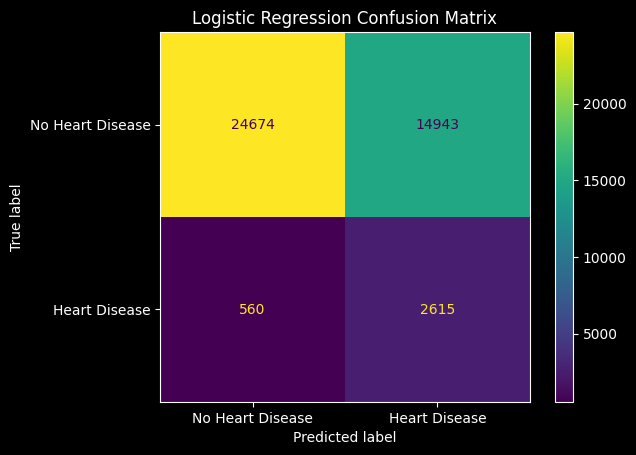

0.8236220472440945

In [ ]:
log_reg_recall =evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')
log_reg_recall

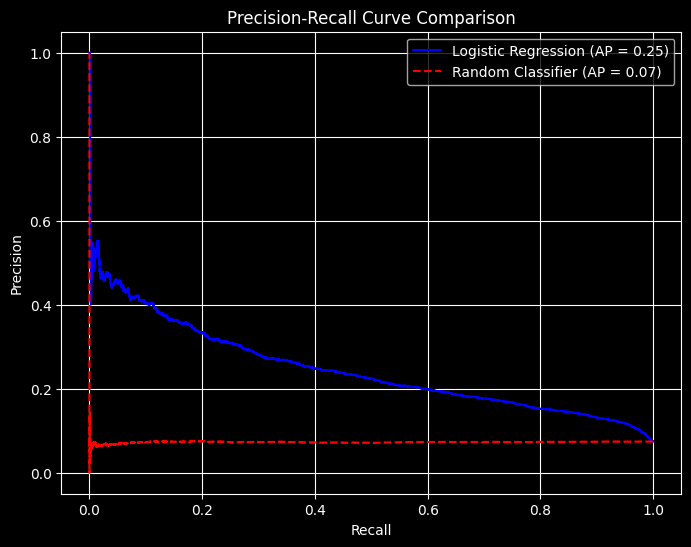

Logistic Regression Average Precision Score: 0.2455
Random Classifier Average Precision Score: 0.0728


In [ ]:
compare_with_random_classifier(log_reg, X_test, y_test, 'Logistic Regression')

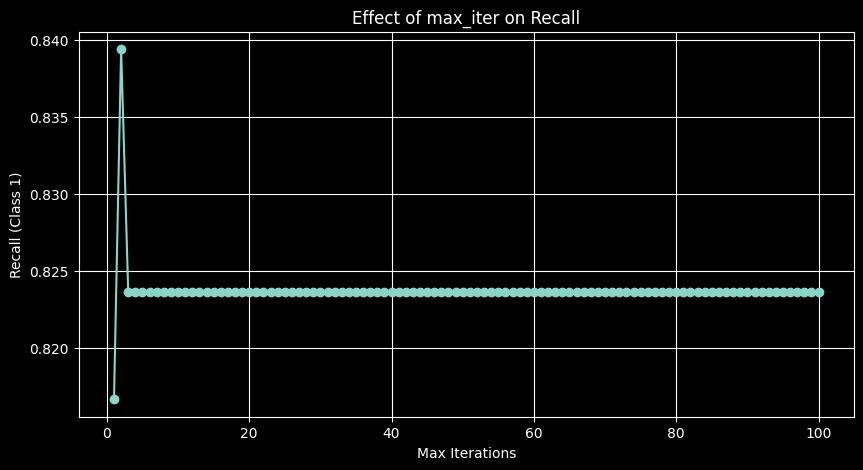

In [ ]:

# Range of max_iter values
max_iter_values = np.arange(1, 101, 1)  # Increase in steps of 10 for efficiency
recall_scores = []

# Loop over different max_iter values
for max_iter in max_iter_values:
    log_reg = LogisticRegression(
        penalty='l1',
        C=0.0001,
        max_iter=max_iter,
        random_state=42,
        class_weight='balanced',
        solver='liblinear'
    )

    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict on test set
    y_pred = log_reg.predict(X_test)

    # Compute recall for class 1
    recall = recall_score(y_test, y_pred, pos_label=1)
    recall_scores.append(recall)

# Plot max_iter vs recall
plt.figure(figsize=(10, 5))
plt.plot(max_iter_values, recall_scores, marker='o', linestyle='-')
plt.xlabel('Max Iterations')
plt.ylabel('Recall (Class 1)')
plt.title('Effect of max_iter on Recall')
plt.grid()
plt.show()


In [ ]:

# Step 4: Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune k later
knn.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", recall_score(y_test, y_pred))


Confusion Matrix:
[[38999   618]
 [ 2919   256]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     39617
         1.0       0.29      0.08      0.13      3175

    accuracy                           0.92     42792
   macro avg       0.61      0.53      0.54     42792
weighted avg       0.88      0.92      0.90     42792

Accuracy Score: 0.08062992125984252


K-fold cross validation used to find optimal value of KNN neighbours, using SMOTE

In [ ]:

# from sklearn.model_selection import StratifiedKFold

# # Range of neighbors to test
# neighbor_range = range(1, 21)
# mean_recalls = []

# # Stratified K-Fold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for k in neighbor_range:
#     fold_recalls = []

#     for train_index, val_index in kf.split(X, y):
#         X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
#         y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


#         # Apply SMOTE only on training fold
#         smote = SMOTE(random_state=42)
#         X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

#         # Train KNN
#         model = KNeighborsClassifier(n_neighbors=k)
#         model.fit(X_train_resampled, y_train_resampled)

#         # Predict and evaluate
#         y_val_pred = model.predict(X_val_fold)
#         recall = recall_score(y_val_fold, y_val_pred)
#         fold_recalls.append(recall)

#     mean_recall = np.mean(fold_recalls)
#     mean_recalls.append(mean_recall)
#     print(f'n_neighbors = {k} | Mean Recall = {mean_recall:.4f}')

# # Find best k
# best_k_index = np.argmax(mean_recalls)
# best_k = neighbor_range[best_k_index]
# print(f'\n✅ Best n_neighbors: {best_k} with Mean Recall: {mean_recalls[best_k_index]:.4f}')


In [ ]:
# Resample training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train KNN on balanced data
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86     39617
         1.0       0.17      0.54      0.26      3175

    accuracy                           0.77     42792
   macro avg       0.56      0.66      0.56     42792
weighted avg       0.90      0.77      0.82     42792



K-fold cross validation used to find optimal value of max_depth in DecisionTrees using SMOTE

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from joblib import Parallel, delayed


# # Function to evaluate a single depth value
# def evaluate_depth(depth, X, y, kf):
#     fold_recalls = []
#     for train_index, val_index in kf.split(X, y):
#         X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
#         y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

#         # Apply SMOTE only on training fold
#         smote = SMOTE(random_state=42)
#         X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

#         # Train Decision Tree
#         model = DecisionTreeClassifier(max_depth=depth, random_state=42)
#         model.fit(X_train_resampled, y_train_resampled)

#         # Predict and evaluate
#         y_val_pred = model.predict(X_val_fold)
#         recall = recall_score(y_val_fold, y_val_pred)
#         fold_recalls.append(recall)

#     mean_recall = np.mean(fold_recalls)
#     print(f'max_depth = {depth} | Mean Recall = {mean_recall:.4f}')
#     return mean_recall

# # Range of max_depth values to test
# depth_range = range(1, 21)

# # Stratified K-Fold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Run in parallel using all available cores
# mean_recalls = Parallel(n_jobs=-1)(delayed(evaluate_depth)(depth, X, y, kf) for depth in depth_range)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(depth_range, mean_recalls, marker='o', linestyle='-')
# plt.xlabel('Max Depth')
# plt.ylabel('Mean Recall')
# plt.title('Decision Tree - Mean Recall vs Max Depth')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Find best depth
# best_depth_index = np.argmax(mean_recalls)
# best_depth = depth_range[best_depth_index]
# print(f'\n✅ Best max_depth: {best_depth} with Mean Recall: {mean_recalls[best_depth_index]:.4f}')

In [ ]:


# Resample training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Decision Tree on balanced data
dt = DecisionTreeClassifier(
    max_depth=5,               # You can tune this manually if needed
    min_samples_split=5,
    random_state=42
)
dt.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79     39617
         1.0       0.16      0.82      0.27      3175

    accuracy                           0.67     42792
   macro avg       0.57      0.74      0.53     42792
weighted avg       0.92      0.67      0.75     42792



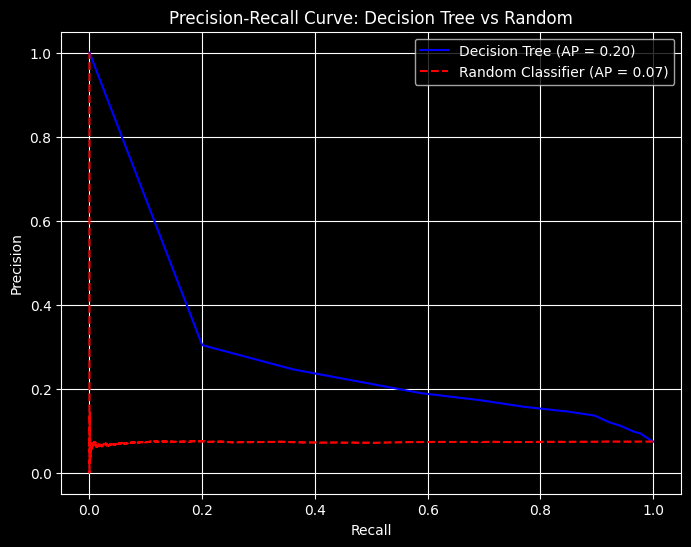


📊 Decision Tree Metrics:
Average Precision Score: 0.2024
Random Classifier AP: 0.0728
✔️ Threshold for Recall ≥ 0.8: 0.0609
Corresponding Precision: 0.0742
Actual Recall: 1.0000


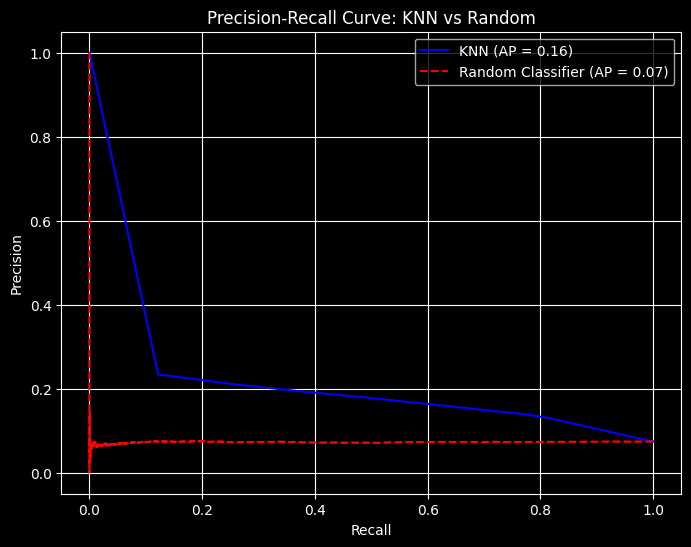


📊 KNN Metrics:
Average Precision Score: 0.1632
Random Classifier AP: 0.0728
✔️ Threshold for Recall ≥ 0.8: 0.0000
Corresponding Precision: 0.0742
Actual Recall: 1.0000


In [ ]:


def evaluate_model_with_recall_focus(model, X_test, y_test, model_name):
    # Predicted probabilities
    y_scores_model = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_model)
    ap = average_precision_score(y_test, y_scores_model)

    # Random classifier
    np.random.seed(42)
    y_scores_random = np.random.rand(len(y_test))
    precision_rand, recall_rand, _ = precision_recall_curve(y_test, y_scores_random)
    ap_rand = average_precision_score(y_test, y_scores_random)

    # Plot PR Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (AP = {ap:.2f})', color='blue')
    plt.plot(recall_rand, precision_rand, label=f'Random Classifier (AP = {ap_rand:.2f})', color='red', linestyle='--')
    plt.title(f'Precision-Recall Curve: {model_name} vs Random')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n📊 {model_name} Metrics:")
    print(f"Average Precision Score: {ap:.4f}")
    print(f"Random Classifier AP: {ap_rand:.4f}")

    # Detailed Recall Check
    best_idx = np.argmax(recall >= 0.8)
    if best_idx < len(thresholds):
        print(f"✔️ Threshold for Recall ≥ 0.8: {thresholds[best_idx]:.4f}")
        print(f"Corresponding Precision: {precision[best_idx]:.4f}")
        print(f"Actual Recall: {recall[best_idx]:.4f}")
    else:
        print("❌ No threshold found where Recall ≥ 0.8")

# ---- Apply SMOTE on training data ----
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ---- Evaluate Decision Tree ----
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
evaluate_model_with_recall_focus(dt_model, X_test, y_test, model_name="Decision Tree")

# ---- Evaluate KNN ----
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled, y_train_resampled)
evaluate_model_with_recall_focus(knn_model, X_test, y_test, model_name="KNN")
